# Image retrieval using deep features

In [94]:
import turicreate

# Load some CIFAR-10 images

In [95]:
image_data = turicreate.SFrame('image_train_data/')

/home/n/miniconda3/lib/python3.7/site-packages/turicreate/visualization/_plot.py:461: UserWarning: Displaying only the first 100 rows.
  warnings.warn("Displaying only the first {} rows.".format(maximum_rows))



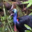
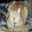
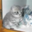
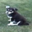
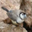
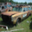
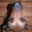
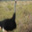
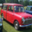
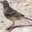
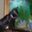
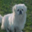
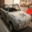
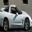
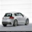
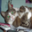
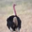
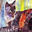
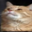
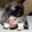
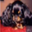
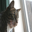
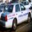
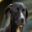
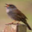
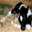
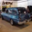
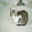
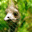
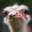
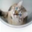
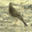
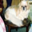
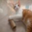
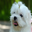
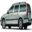
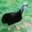
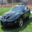
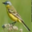
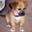
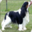
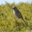
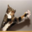
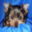
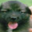
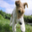
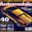
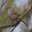
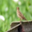
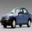
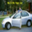
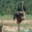
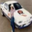
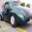
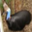
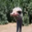
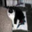
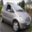
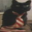
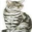
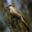
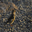
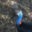
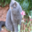
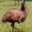
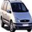
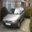
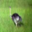
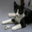
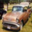
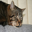
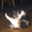
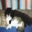
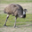
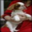
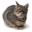
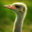
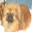
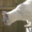
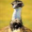
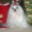
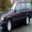
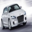
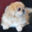
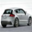
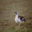
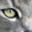
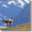
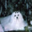
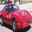
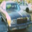
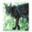
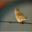
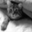
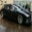
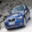
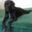
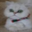
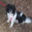
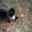

In [96]:
image_data['image'].explore()

# Compute deep features from our images

In [97]:
#deep_learning_model = turicreate.load_model('imagenet_model_iter45')
#image_data['deep_features'] = deep_learning_model.extract_features(image_data)

In [98]:
image_data

Columns:
	id	int
	image	Image
	label	str
	deep_features	array
	image_array	array

Rows: 2005

Data:
+-----+----------------------+------------+-------------------------------+
|  id |        image         |   label    |         deep_features         |
+-----+----------------------+------------+-------------------------------+
|  24 | Height: 32 Width: 32 |    bird    | [0.24287176132202148, 1.09... |
|  33 | Height: 32 Width: 32 |    cat     | [0.5250879526138306, 0.0, ... |
|  36 | Height: 32 Width: 32 |    cat     | [0.5660159587860107, 0.0, ... |
|  70 | Height: 32 Width: 32 |    dog     | [1.129795789718628, 0.0, 0... |
|  90 | Height: 32 Width: 32 |    bird    | [1.7178692817687988, 0.0, ... |
|  97 | Height: 32 Width: 32 | automobile | [1.5781855583190918, 0.0, ... |
| 107 | Height: 32 Width: 32 |    dog     | [0.0, 0.0, 0.2206778526306... |
| 121 | Height: 32 Width: 32 |    bird    | [0.0, 0.23753464221954346,... |
| 136 | Height: 32 Width: 32 | automobile | [0.0, 0.0, 0.0, 0.0, 0.0, ... |
| 138 | Height: 32 Width: 32 |    bird    | [0.6589357256889343, 0.0, ... |
+-----+----------------------+------------+-------------------------------+
+-------------------------------+
|          image_array          |
+-------------------------------+
| [73.0, 77.0, 58.0, 71.0, 6... |
| [7.0, 5.0, 8.0, 7.0, 5.0, ... |
| [169.0, 122.0, 65.0, 131.0... |
| [154.0, 179.0, 152.0, 159.... |
| [216.0, 195.0, 180.0, 201.... |
| [33.0, 44.0, 27.0, 29.0, 4... |
| [97.0, 51.0, 31.0, 104.0, ... |
| [93.0, 96.0, 88.0, 102.0, ... |
| [35.0, 59.0, 53.0, 36.0, 5... |
| [205.0, 193.0, 195.0, 200.... |
+-------------------------------+
[2005 rows x 5 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

# Create a nearest neighbors model to retrieve images from deep features

In [99]:
knn_model = turicreate.nearest_neighbors.create(image_data,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

# Use image retrieval model with deep features to find similar images

In [100]:
cat = image_data[18:19]


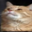

In [101]:
cat['image'].explore()

In [102]:
knn_model.query(cat)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 123.166ms    |

| Done         |         | 100         | 190.589ms    |

+--------------+---------+-------------+--------------+

Columns:
	query_label	int
	reference_label	int
	distance	float
	rank	int

Rows: 5

Data:
+-------------+-----------------+--------------------+------+
| query_label | reference_label |      distance      | rank |
+-------------+-----------------+--------------------+------+
|      0      |       384       |        0.0         |  1   |
|      0      |       6910      | 36.94031379506751  |  2   |
|      0      |      39777      | 38.46348889747021  |  3   |
|      0      |      36870      | 39.75596231189652  |  4   |
|      0      |      41734      | 39.786601414815024 |  5   |
+-------------+-----------------+--------------------+------+
[5 rows x 4 columns]

In [103]:
def get_images_from_ids(query_result):
    return image_data.filter_by(query_result['reference_label'],'id')

In [104]:
cat_neighbors = get_images_from_ids(knn_model.query(cat))

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 5.107ms      |

| Done         |         | 100         | 91.024ms     |

+--------------+---------+-------------+--------------+


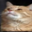
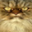
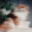
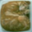
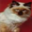

In [105]:
cat_neighbors['image'].explore()

# Find images similar to a car

In [106]:
car = image_data[8:9]


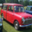

In [107]:
car['image'].explore()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 12.239ms     |

| Done         |         | 100         | 104.638ms    |

+--------------+---------+-------------+--------------+


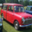
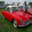
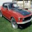
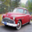
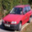

In [108]:
get_images_from_ids(knn_model.query(car))['image'].explore()

# Create a lambda function to find and show nearest neighbors to an image

In [109]:
show_neighbors = lambda i: get_images_from_ids(knn_model.query(image_data[i:i+1]))['image'].explore()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 10.87ms      |

| Done         |         | 100         | 102.757ms    |

+--------------+---------+-------------+--------------+


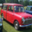
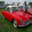
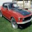
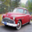
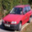

In [110]:
show_neighbors(8)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 5.043ms      |

| Done         |         | 100         | 97.057ms     |

+--------------+---------+-------------+--------------+


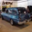
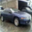
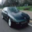
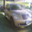
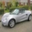

In [111]:
show_neighbors(26)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 8.839ms      |

| Done         |         | 100         | 98.144ms     |

+--------------+---------+-------------+--------------+


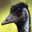
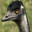
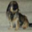
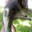
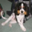

In [112]:
show_neighbors(500)

## Assignment

## Task 1: Compute Summary Statistics

In [113]:
sketch = turicreate.Sketch(image_data['label']) #method 1

In [114]:
sketch


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


In [115]:
image_data['label'].summary() #method 2


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


## Task 2: Create category-specific image retrieval models

In [116]:
dogs_image = image_data[(image_data['label'] == 'dog')]

In [117]:
cats_image = image_data[(image_data['label'] == 'cat')]

In [118]:
automobile_image = image_data[(image_data['label'] == 'automobile')]

In [119]:
birds_image = image_data[(image_data['label'] == 'bird')]

In [120]:
dogs_model = turicreate.nearest_neighbors.create(dogs_image,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [121]:
cats_model = turicreate.nearest_neighbors.create(cats_image,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [122]:
automobile_model = turicreate.nearest_neighbors.create(automobile_image,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [123]:
birds_model = turicreate.nearest_neighbors.create(birds_image,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [124]:
image_test = turicreate.SFrame('image_test_data/')

In [125]:
test_cat = image_test[0:1] #find cat images similar to this

In [126]:
cats_model.query(test_cat)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 14.339ms     |

| Done         |         | 100         | 50.528ms     |

+--------------+---------+-------------+--------------+

Columns:
	query_label	int
	reference_label	int
	distance	float
	rank	int

Rows: 5

Data:
+-------------+-----------------+--------------------+------+
| query_label | reference_label |      distance      | rank |
+-------------+-----------------+--------------------+------+
|      0      |      16289      | 34.62371920804245  |  1   |
|      0      |      45646      | 36.00687992842462  |  2   |
|      0      |      32139      | 36.52008134363789  |  3   |
|      0      |      25713      | 36.754850252057054 |  4   |
|      0      |       331       | 36.87312281675268  |  5   |
+-------------+-----------------+--------------------+------+
[5 rows x 4 columns]

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 6.035ms      |

| Done         |         | 100         | 35.676ms     |

+--------------+---------+-------------+--------------+


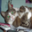
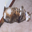
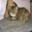
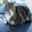
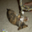

In [127]:
get_images_from_ids(cats_model.query(test_cat))['image'].explore()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 4.149ms      |

| Done         |         | 100         | 32.772ms     |

+--------------+---------+-------------+--------------+


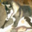
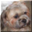
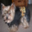
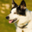
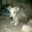

In [128]:
get_images_from_ids(dogs_model.query(test_cat))['image'].explore()

## Task 3: Try a simple example of nearest-neighbors classification

In [129]:
def find_mean_of_distances(model, query_result):
    sum = 0
    count = 0
    for i in query_result['distance']:
        sum = sum + i
        count = count + 1
    return sum/count

In [130]:
find_mean_of_distances(dogs_model, dogs_model.query(test_cat))

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 13.618ms     |

| Done         |         | 100         | 56.642ms     |

37.77071136184157

+--------------+---------+-------------+--------------+

In [131]:
find_mean_of_distances(cats_model, cats_model.query(test_cat))

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 15.549ms     |

| Done         |         | 100         | 63.821ms     |

+--------------+---------+-------------+--------------+

36.15573070978294

## Task 4: [Challenging Question] Computing nearest neighbors accuracy using SFrame operations:

In [132]:
##Split test data into categories

In [133]:
dogs_test_image = image_test[(image_test['label'] == 'dog')]

In [134]:
cats_test_image = image_test[(image_test['label'] == 'cat')]

In [135]:
automobile_test_image = image_test[(image_test['label'] == 'automobile')]

In [136]:
birds_test_image = image_test[(image_test['label'] == 'bird')]

In [137]:
##Finding nearest neighbors in the training set for each part of the test set:

In [138]:
dogs_model.query(dogs_test_image)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 63000   | 12.3772     | 289.297ms    |

| Done         | 509000  | 100         | 323.412ms    |

+--------------+---------+-------------+--------------+

Columns:
	query_label	int
	reference_label	int
	distance	float
	rank	int

Rows: 5000

Data:
+-------------+-----------------+--------------------+------+
| query_label | reference_label |      distance      | rank |
+-------------+-----------------+--------------------+------+
|      0      |      49803      | 33.47735903726335  |  1   |
|      0      |      21235      | 34.415221599022765 |  2   |
|      0      |      23803      | 34.81386300614125  |  3   |
|      0      |      41752      | 34.928931346762994 |  4   |
|      0      |      13865      | 37.15464091935056  |  5   |
|      1      |       5755      | 32.84584956840554  |  1   |
|      1      |      38013      | 35.63795725175503  |  2   |
|      1      |      10669      | 37.00424635846063  |  3   |
|      1      |      11933      | 37.005163212466954 |  4   |
|      1      |      48566      | 37.927903158721776 |  5   |
+-------------+-----------------+--------------------+------+
[5000 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [139]:
cats_model.query(cats_test_image)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 64000   | 12.5737     | 303.82ms     |

| Done         | 509000  | 100         | 369.288ms    |

+--------------+---------+-------------+--------------+

Columns:
	query_label	int
	reference_label	int
	distance	float
	rank	int

Rows: 5000

Data:
+-------------+-----------------+--------------------+------+
| query_label | reference_label |      distance      | rank |
+-------------+-----------------+--------------------+------+
|      0      |      16289      | 34.62371920804243  |  1   |
|      0      |      45646      | 36.00687992842474  |  2   |
|      0      |      32139      | 36.52008134363798  |  3   |
|      0      |      25713      | 36.75485025205706  |  4   |
|      0      |       331       | 36.87312281675264  |  5   |
|      1      |      13094      | 33.868057930239424 |  1   |
|      1      |      10883      | 34.441406895086644 |  2   |
|      1      |      43295      | 34.83487750453903  |  3   |
|      1      |       6304      | 34.91594788353484  |  4   |
|      1      |       8302      | 35.13671773216264  |  5   |
+-------------+-----------------+--------------------+------+
[5000 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [140]:
dog_cat_neighbors = cats_model.query(dogs_test_image, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 63000   | 12.3772     | 256.622ms    |

| Done         | 509000  | 100         | 310.33ms     |

+--------------+---------+-------------+--------------+

In [141]:
dog_bird_neighbors = birds_model.query(dogs_test_image, k = 1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 60000   | 12.5523     | 244.051ms    |

| Done         | 478000  | 100         | 283.204ms    |

+--------------+---------+-------------+--------------+

In [142]:
dog_automobile_neighbors = automobile_model.query(dogs_test_image, k = 1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 64000   | 12.5737     | 270.086ms    |

| Done         | 509000  | 100         | 324.217ms    |

+--------------+---------+-------------+--------------+

In [143]:
dog_dog_neighbors = dogs_model.query(dogs_test_image, k = 1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 63000   | 12.3772     | 264.124ms    |

| Done         | 509000  | 100         | 308.812ms    |

+--------------+---------+-------------+--------------+

In [144]:
#create dog distances SFrame
dog_distances = turicreate.SFrame({'dog-automobile' : dog_automobile_neighbors['distance'], 
                                   'dog-bird' : dog_bird_neighbors['distance'],
                                   'dog-cat' : dog_cat_neighbors['distance'], 
                                   'dog-dog' : dog_dog_neighbors['distance']})

In [145]:
dog_distances

Columns:
	dog-automobile	float
	dog-bird	float
	dog-cat	float
	dog-dog	float

Rows: 1000

Data:
+--------------------+--------------------+--------------------+
|   dog-automobile   |      dog-bird      |      dog-cat       |
+--------------------+--------------------+--------------------+
| 41.95797614571203  | 41.75386473035126  | 36.419607706754384 |
| 46.00213318067788  |  41.3382958924861  | 38.83532688735542  |
| 42.946229069238804 | 38.615759085289056 | 36.97634108541546  |
| 41.68660600484793  | 37.08922699538214  | 34.575007291446106 |
| 39.22696649347584  | 38.27228869398105  | 34.77882479101661  |
| 40.58451176980721  | 39.146208923590486 | 35.11715782924591  |
| 45.10673529610854  | 40.523040105962316 | 40.60958309132649  |
| 41.32211409739762  | 38.19479183926956  | 39.90368673062214  |
| 41.82446549950164  | 40.156713166131446 | 38.067470016821176 |
| 45.497692940110376 | 45.55979626027668  | 42.72587329506032  |
+--------------------+--------------------+--------------------+
+--------------------+
|      dog-dog       |
+--------------------+
| 33.47735903726335  |
| 32.84584956840554  |
| 35.03970731890584  |
| 33.90103276968193  |
| 37.484925090925636 |
| 34.94516534398124  |
| 39.095727834463545 |
| 37.76961310322034  |
| 35.10891446032838  |
| 43.242283258453455 |
+--------------------+
[1000 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [146]:
##Computing the number of correct predictions using 1-nearest neighbors for the dog class:

In [151]:
def is_dog_correct(row):
    if row['dog-dog'] < row['dog-cat'] and row['dog-automobile'] and row['dog-bird']:
        return 1
    #elif row['dog-dog'] > row['dog-cat'] and row['dog-automobile'] and row['dog-bird']:
    else:
        return 0

In [155]:
dog_distances.apply(is_dog_correct)

dtype: int
Rows: 1000
[1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, ... ]

In [156]:
dog_distances.apply(is_dog_correct).sum()

722